In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [14]:
# Diabetes Datensatz laden
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.DataFrame(diabetes.target, columns=["DiseaseProgression"])

# Split in Trainings- und Testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lineare Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predicition und Fehler aus der LR
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_test_pred)

train_error_lr = mean_squared_error(y_train, y_train_pred)
test_error_lr = mean_squared_error(y_test, y_test_pred)

# Grid für mögliche Werte von Alpha definieren 
alpha_values = np.logspace(-3, 3, 100)

# Ridge Regression mit Cross-Validation
ridge_model_cv = Ridge()
ridge_params = {'alpha': alpha_values}

ridge_grid_search = GridSearchCV(ridge_model_cv, ridge_params, scoring='neg_mean_squared_error', cv=5)
ridge_grid_search.fit(X_train, y_train)

# Get the best ridge model and its alpha value
best_ridge_alpha = ridge_grid_search.best_params_['alpha']
best_ridge_model = ridge_grid_search.best_estimator_

# Predictions and errors using best ridge model
y_train_pred_ridge_cv = best_ridge_model.predict(X_train)
y_test_pred_ridge_cv = best_ridge_model.predict(X_test)

train_error_ridge_cv = mean_squared_error(y_train, y_train_pred_ridge_cv)
test_error_ridge_cv = mean_squared_error(y_test, y_test_pred_ridge_cv)

# Lasso Regression with Cross-Validation
lasso_model_cv = Lasso()
lasso_params = {'alpha': alpha_values}

lasso_grid_search = GridSearchCV(lasso_model_cv, lasso_params, scoring='neg_mean_squared_error', cv=5)
lasso_grid_search.fit(X_train, y_train)

# Get the best lasso model and its alpha value
best_lasso_alpha = lasso_grid_search.best_params_['alpha']
best_lasso_model = lasso_grid_search.best_estimator_

# Predictions and errors using best lasso model
y_train_pred_lasso_cv = best_lasso_model.predict(X_train)
y_test_pred_lasso_cv = best_lasso_model.predict(X_test)

train_error_lasso_cv = mean_squared_error(y_train, y_train_pred_lasso_cv)
test_error_lasso_cv = mean_squared_error(y_test, y_test_pred_lasso_cv)

print(f"Optimaler Wert für Alpha (Lasso): {best_lasso_alpha}")
print(f"Optimaler Wert für Alpha (Ridge): {best_ridge_alpha}")

print('\n')
print(f"Test MSE Lineare Regression: {mse_lr}")
print(f"Test MSE Lasso Regression: {test_error_lasso_cv}")
print(f"Test MSE Ridge Regression: {test_error_ridge_cv}")


Optimaler Wert für Alpha (Lasso): 0.07564633275546291
Optimaler Wert für Alpha (Ridge): 0.06579332246575682


Test MSE Lineare Regression: 2900.193628493483
Test MSE Lasso Regression: 2800.6630272180337
Test MSE Ridge Regression: 2862.344850385715


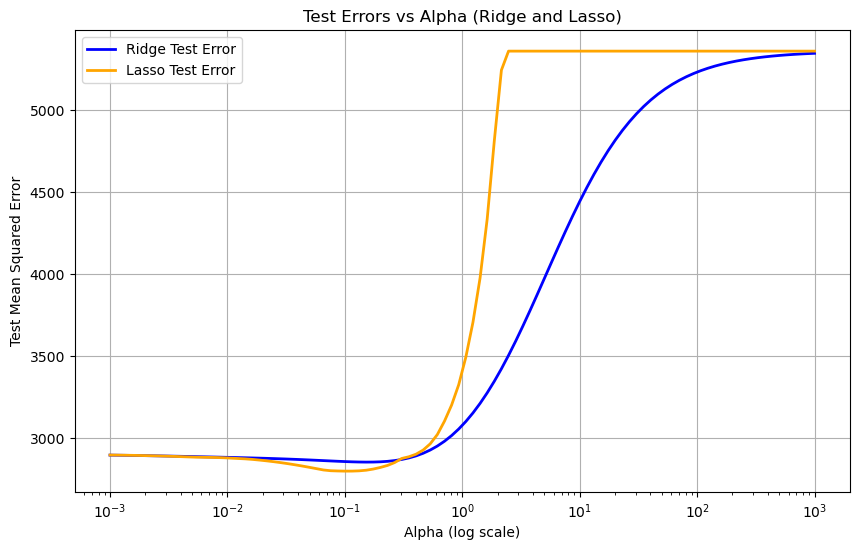

In [4]:
# Define a range of alpha values (lambda)
alpha_values = np.logspace(-3, 3, 100)

# Initialize lists to store errors
ridge_test_errors = []
lasso_test_errors = []

# Loop through alpha values and calculate test errors for Ridge and Lasso
for alpha in alpha_values:
    # Ridge regression
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_test_pred_ridge = ridge_model.predict(X_test)
    ridge_test_errors.append(mean_squared_error(y_test, y_test_pred_ridge))

    # Lasso regression
    lasso_model = Lasso(alpha=alpha, max_iter=10000)
    lasso_model.fit(X_train, y_train)
    y_test_pred_lasso = lasso_model.predict(X_test)
    lasso_test_errors.append(mean_squared_error(y_test, y_test_pred_lasso))

# Plot the test errors for Ridge and Lasso as a function of alpha
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, ridge_test_errors, label='Ridge Test Error', color='blue', linewidth=2)
plt.plot(alpha_values, lasso_test_errors, label='Lasso Test Error', color='orange', linewidth=2)
plt.xscale('log')  # Use logarithmic scale for alpha
plt.xlabel('Alpha (log scale)')
plt.ylabel('Test Mean Squared Error')
plt.title('Test Errors vs Alpha (Ridge and Lasso)')
plt.legend()
plt.grid(True)
plt.show()

In [11]:

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Get the coefficients for the linear model
lr_coefficients = lr_model.coef_

# Define a range of alpha values for Lasso
alpha_values = np.logspace(-3, 3, 100)

# Lasso Regression with Cross-Validation to find the best alpha
lasso_model_cv = Lasso(max_iter=10000)
lasso_params = {'alpha': alpha_values}
lasso_grid_search = GridSearchCV(lasso_model_cv, lasso_params, scoring='neg_mean_squared_error', cv=5)
lasso_grid_search.fit(X_train, y_train)

# Get the best Lasso model and its alpha value
best_lasso_alpha = lasso_grid_search.best_params_['alpha']
best_lasso_model = lasso_grid_search.best_estimator_

# Train the Lasso model with the best alpha
best_lasso_model.fit(X_train, y_train)

# Get the coefficients for the Lasso model
lasso_coefficients = best_lasso_model.coef_

# Display the coefficients for both Linear and Lasso models
coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Linear Coefficients': lr_coefficients.flatten(),
    'Lasso Coefficients (Alpha = {:.3f})'.format(best_lasso_alpha): lasso_coefficients
})


# Print the best alpha value for Lasso
print(f"Optimal Alpha for Lasso: {best_lasso_alpha}")


Optimal Alpha for Lasso: 0.07564633275546291


In [8]:
coefficients_df

,Feature,Linear Coefficients,Lasso Coefficients (Alpha = 0.076)
0,age,37.904021,0.000000
1,sex,-241.964362,-169.934210
2,bmi,542.428759,554.297137
3,bp,347.703844,312.572376
4,s1,-931.488846,-104.200467
5,s2,518.062277,-0.000000
6,s3,163.419983,-235.809219
7,s4,275.317902,0.000000
8,s5,736.198859,462.030593
9,s6,48.670657,37.752663
